# CityLines

## Download the dataset

Download the CSV files from https://kaggle.com/citylines/city-lines into a subfolder called `citylines` and unzip them.

In [1]:
ls citylines

cities.csv  station_lines.csv  systems.csv      tracks.csv
lines.csv   stations.csv       track_lines.csv


# Reading CSV files 

## Using the standard libary module csv

In [2]:
import csv

In [3]:
with open('citylines/cities.csv') as f:
    reader = csv.DictReader(f)
    cities = [line for line in reader]

In [4]:
print(len(cities))

334


## Loading CSVs using pandas

In [5]:
import pandas as pd
transport_systems = pd.read_csv('citylines/systems.csv', index_col='id')
cities = pd.read_csv('citylines/cities.csv', index_col="id")
track_lines = pd.read_csv('citylines/track_lines.csv', index_col='id')
stations = pd.read_csv('citylines/stations.csv', index_col='id')
station_lines = pd.read_csv('citylines/station_lines.csv', index_col='id')
lines = pd.read_csv('citylines/lines.csv', index_col='id')
tracks = pd.read_csv('citylines/tracks.csv', index_col='id')

In [6]:
cities

,name,coords,start_year,url_name,country,country_state
id,,,,,,
5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN
...,...,...,...,...,...,...
265,Nantes,POINT(-1.553889 47.217222),1877.0,nantes,France,NaN
110,Stockholm,POINT(18.05 59.28333333),1919.0,stockholm,Sweden,NaN
266,Rennes,POINT(-1.680833 48.114167),1897.0,rennes,France,NaN


`pandas` dataframes provide many methods for working with tabular data. 

In [7]:
# addressing a specific cells of a pandas data frame
cities['name'][16]

'Belém'

## Parsing coordinate strings

Somd data in this data set are not normalized, i.e. entire sets of values are written into individual cells in the form of string. These need to be parsed out. For example, the `geometry` field in the the `tracks` table contains the coordinates of the line waypoints as a string.

In [8]:
g = tracks['geometry'][16]
g

'LINESTRING(-58.4565034467506 -34.5622493173683,-58.4577927653747 -34.5607441036916,-58.4591937797194 -34.5591074989372,-58.4607837178131 -34.5573661677451,-58.4616310994955 -34.5564367568353,-58.4624199130135 -34.5556111854062)'

In [9]:
# find the positions of the opening and closing parenthesis
start, end = g.find('('), g.find(')')
start, end

(10, 226)

In [10]:
# extract the part inside the parenthesis
g[start+1:end]

'-58.4565034467506 -34.5622493173683,-58.4577927653747 -34.5607441036916,-58.4591937797194 -34.5591074989372,-58.4607837178131 -34.5573661677451,-58.4616310994955 -34.5564367568353,-58.4624199130135 -34.5556111854062'

In [11]:
# split the coordinate pairs into a list
g[start+1:end].split(',')

['-58.4565034467506 -34.5622493173683',
 '-58.4577927653747 -34.5607441036916',
 '-58.4591937797194 -34.5591074989372',
 '-58.4607837178131 -34.5573661677451',
 '-58.4616310994955 -34.5564367568353',
 '-58.4624199130135 -34.5556111854062']

In [12]:
# finally, convert into a 2D numpy array
import numpy as np
points = [[float(f) for f in pair.split(' ')]  for pair in g[start+1:end].split(',')]
np.array(points)

array([[-58.45650345, -34.56224932],
       [-58.45779277, -34.5607441 ],
       [-58.45919378, -34.5591075 ],
       [-58.46078372, -34.55736617],
       [-58.4616311 , -34.55643676],
       [-58.46241991, -34.55561119]])

### organize parsers as functions

Now organize compose these steps into a function: 

In [13]:
def parse_linestring(geometry):
    """
    :param geometry: a string in the format "LINESTRING(x1 y1, x2 y2, ..., xn yn)"
    return numpy array of shape (n, 2) with coordinates
    """
    start = geometry.find('(')
    end = geometry.find(')')
    substring = geometry[start+1:end]
    return np.array(
        [[float(f) for f in pair.split(' ')] for pair in substring.split(',')])
    

In [14]:
# test it
parse_linestring(tracks['geometry'][2563])

array([[16.4151057, 48.1907238],
       [16.4156455, 48.190389 ],
       [16.4170845, 48.1895171]])

In [15]:
# similarly, define a function that takes a single point for the city coords for example.
def parse_point(coords):
    """
    :param coords: a string in the form "POINT(x, y)"
    :return: [x, y] as floats
    """
    start, end = coords.find('('), coords.find(')')
    return [float(p) for p in coords[start+1:end].split(' ')]

In [16]:
cities['name'][16], parse_point(cities['coords'][16])

('Belém', [-48.48333333, -1.466666667])

### Plot all cities
Use our point parsing function to plot all cities on the map

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
city_points = np.array([parse_point(p) for p in cities['coords']])

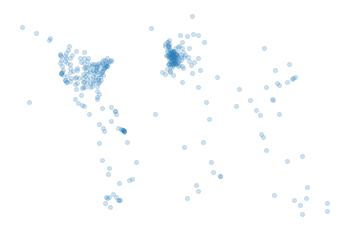

In [19]:
plt.scatter(city_points[:,0], city_points[:,1], s=16, alpha=0.2);
plt.axis(False);

### plot the transit system of a given city

In [20]:
cities

,name,coords,start_year,url_name,country,country_state
id,,,,,,
5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN
...,...,...,...,...,...,...
265,Nantes,POINT(-1.553889 47.217222),1877.0,nantes,France,NaN
110,Stockholm,POINT(18.05 59.28333333),1919.0,stockholm,Sweden,NaN
266,Rennes,POINT(-1.680833 48.114167),1897.0,rennes,France,NaN


First, learn about the Python `zip` function to be able to iterate over two sequencies at once.

In [21]:
seq1 = 1, 2, 3
seq2 = 'abc'

In [22]:
for i in seq1:
    print(i)
for j in seq2:
    print(j)

1
2
3
a
b
c


In [23]:
# iterate over both sequences at once
for i in range(len(seq1)):
    print(seq1[i], seq2[i])

1 a
2 b
3 c


In [24]:
# same thing with zip
for i, j in zip(seq1, seq2):
    print(i, j)

1 a
2 b
3 c


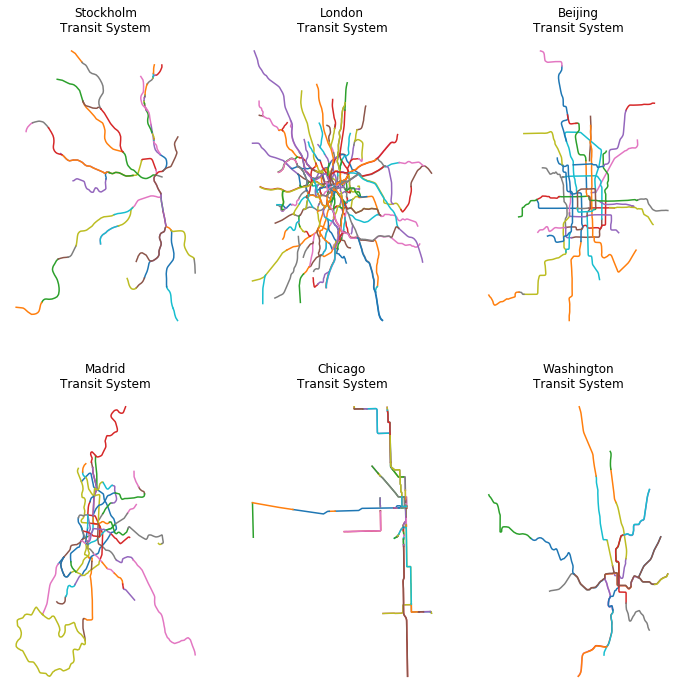

In [25]:
codes = 110, 69, 15, 71, 147, 252

fig, axx = plt.subplots(2, 3, figsize=(12, 12))

for code, ax in zip(codes, axx.flatten()):
    name = cities['name'][code]
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        ax.plot(xy[:,0], xy[:, 1])
    ax.set_title(f'{name}\nTransit System')
    ax.axis(False);
    
fig.savefig('map.png', dpi=300)

Now recall our function `route_length` from Homework Set 3 to compute the length of a route from the coordinates of its waypoints. 

In [26]:
# compute the length (km) of a line

import math
def route_length(line): 
    """
    distance of a line defined by a sequence of n waypoints 
    :param line: is a numpy array of shape (n, 2) 
    :return: length of the line in km
    """
    earth_radius = 6371
    assert len(cities) >=2, 'at least two cities are requied'
    
    point1 = line[0]
    total = 0.0
    for point2 in line[1:]:
        x1, y1 = math.radians(point1[0]), math.radians(point1[1])
        x2, y2 = math.radians(point2[0]), math.radians(point2[1])
        total += math.asin(math.sqrt(
            math.sin((x2 - x1) / 2)**2 + 
            math.cos(y1) * math.cos(y2) * math.sin((y2 - y1) / 2)**2))
        point1 = point2
    return total * 2 * earth_radius

In [27]:
codes = 110, 69, 15, 71, 147, 252, 114

for code in codes:
    name = cities['name'][code]
    length = 0
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        length += route_length(xy)
    print(f"The length of the {name} transit system is {length:.1f} km")

The length of the Stockholm transit system is 189.9 km
The length of the London transit system is 2394.6 km
The length of the Beijing transit system is 727.2 km
The length of the Madrid transit system is 340.8 km
The length of the Chicago transit system is 200.2 km
The length of the Washington transit system is 332.6 km
The length of the Tokyo transit system is 5204.0 km


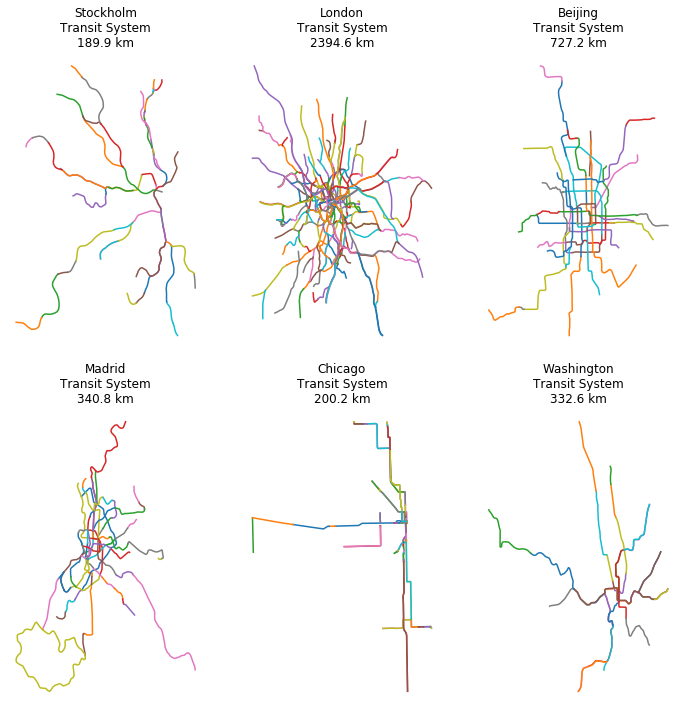

In [28]:
codes = 110, 69, 15, 71, 147, 252

fig, axx = plt.subplots(2, 3, figsize=(12, 12))

for code, ax in zip(codes, axx.flatten()):
    name = cities['name'][code]
    length = 0
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        ax.plot(xy[:,0], xy[:, 1])
        length += route_length(xy)
    ax.set_title(f'{name}\nTransit System\n{length:.1f} km')
    ax.axis(False);
    
# save into a PNG file
fig.savefig('map.png', dpi=300)

Now compile cities into a structure with the key of city name and the value of its transit system length.

In [29]:
systems = {}

for code in cities.index:
    length = 0
    name = cities['name'][code]
    for line in tracks[(tracks['city_id'] == code) & (tracks['closure'] > 2020)]['geometry']:
        try:
            xy = parse_linestring(line)
        except ValueError:
            continue
        length += route_length(xy)
    if length:
        print(f"{code} {name} {length:.1f} km")
        systems[name] = length

147 Chicago 165.0 km
280 Clermont-Ferrand 34.3 km
268 San Sebastián 81.4 km
29 Budapest 77.5 km
23 Bordeaux 135.9 km
19 Berlin 1.3 km
283 Besancon 35.1 km
45 Edinburgh 6.7 km
48 Glasgow 618.6 km
294 Le Mans 40.1 km
56 Hong Kong 35.4 km
63 Kuala Lumpur 86.4 km
300 Montpellier 108.1 km
70 Lyons 147.1 km
67 Lisbon 111.7 km
72 Manchester 8.4 km
82 Munich 183.2 km
74 Marseilles 78.2 km
79 Milan 613.8 km
310 Rouen 31.8 km
305 Dijon 41.1 km
317 Mulhouse 58.8 km
324 Nice 16.5 km
314 Reims 12.6 km
318 Nancy 20.1 km
308 Orleans 46.1 km
331 Le Havre 32.4 km
327 Lille 99.2 km
91 Osaka 2518.9 km
87 Naples 24.1 km
95 Paris 633.8 km
325 Toulouse 46.3 km
89 Newcastle-on-Tyne 195.6 km
328 Strasbourg 53.8 km
104 Salvador 27.2 km
99 Prague 115.6 km
307 Tours 30.0 km
103 Rome 155.5 km
275 Angers 37.2 km
106 São Paulo 839.7 km
286 Grenoble 91.0 km
111 Sydney 370.9 km
77 Melbourne 65.9 km
102 Rio de Janeiro 167.3 km
64 La Paz 34.2 km
114 Tokyo 4400.5 km
293 Brest 33.2 km
116 Venice 55.2 km
124 Valparaíso 55

In [30]:
# sort by values 
systems = {k: systems[k] for k in sorted(systems, key=systems.get)}

Text(0.5, 0, 'Total length of all lines (km)')

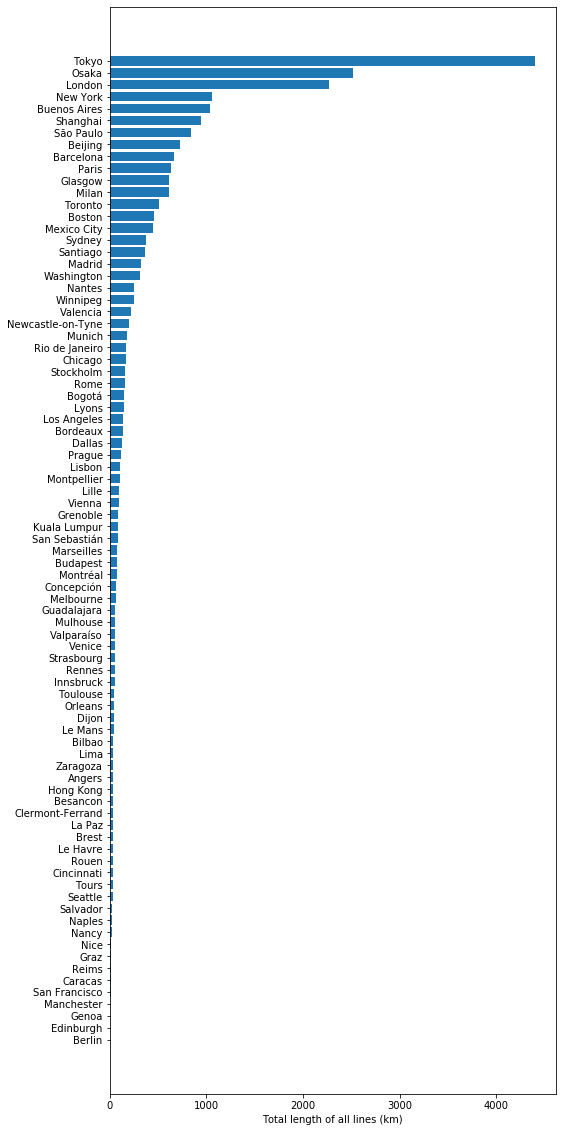

In [31]:
# plot the horizontal barplot of the length of city transport systems
fig, ax = plt.subplots(1, 1, figsize=(8, 20))
ax.barh(np.r_[:len(systems)], list(systems.values()))
ax.set_yticks(np.r_[:len(systems)])
ax.set_yticklabels(list(systems))
ax.set_xlabel('Total length of all lines (km)')

Text(0.5, 0, 'Total length of all lines (km)')

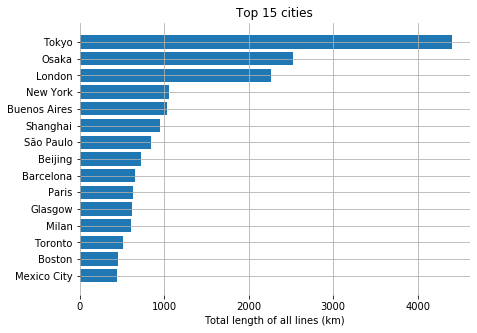

In [32]:
# plot the horizontal barplot of the length of city transport systems
# customize 
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 15
ax.barh(np.r_[:n], list(systems.values())[-n:])
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all lines (km)')


Text(0.5, 0, 'Total length of all lines (km)')

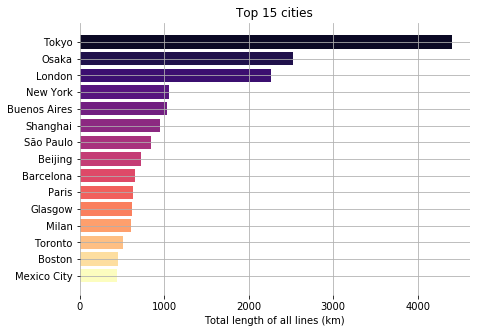

In [33]:
# plot the horizontal barplot of the length of city transport systems
# custom colors, sequential
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 15
colors = [plt.cm.magma_r(i/n) for i in range(n)]
ax.barh(np.r_[:n], list(systems.values())[-n:], color=colors)
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all lines (km)')

Text(0.5, 0, 'Total length of all blines (km)')

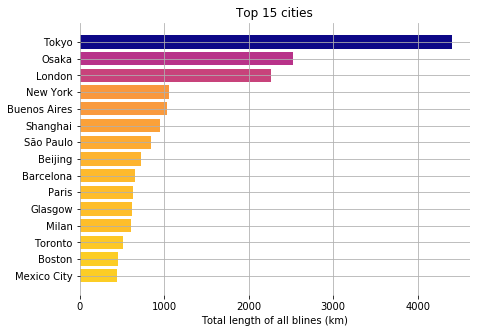

In [34]:
# plot the horizontal barplot of the length of city transport systems
# custom colors reflecting length

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 15
lengths = list(systems.values())[-n:]
colors = [plt.cm.plasma_r(length/lengths[-1]) for length in lengths]
ax.barh(np.r_[:n], lengths, color=colors)
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all blines (km)')

# Final Project

Work with the citylines datasets to produce several visualizations and present them in class. The first four visualization are specified. Come up with four additional ones for the presentation. Describe your work.

## Visualizaiton

1. Maps of 12 selected cities on a grid, e.g. 3$\times$4 with each line in a different color (mostly solved above)
2. A bar plot of the total lengths of each city's tranit lines (mostly solved above)
3. Total length of the transit lines across all cities across time (km), or change per decade. 
4. World map of cities with an indication of the size of the transit city as a dot size or color.
5. come up with an interesting question and visualization
6. come up with an interesting question and visualization
7. come up with an interesting question and visualization
8. come up with an interesting question and visualization
  

# Some tricks working with Pandas

## Joining country into the tracks table

In [35]:
country_tracks = tracks.join(cities['country'], on='city_id')
country_tracks

,geometry,buildstart,opening,closure,length,city_id,country
id,,,,,,,
1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29,Hungary
2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118,Austria
2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118,Austria
2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118,Austria
2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118,Austria
...,...,...,...,...,...,...,...
9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48,Scotland
9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48,Scotland
9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48,Scotland


## Selecting subsets based on multiple conditions

In [36]:
# tracks opened in the 1920s in Japan

country_tracks[
    (country_tracks['opening'] >= 1920) & 
    (country_tracks['opening'] < 1930) & 
    (country_tracks['country'] == 'Japan')]

,geometry,buildstart,opening,closure,length,city_id,country
id,,,,,,,
3434,"LINESTRING(139.387327940585 35.3676500392482,1...",1926.0,1926.0,999999.0,3534,114,Japan
3433,"LINESTRING(139.407314018783 35.3308431975794,1...",1921.0,1921.0,999999.0,4966,114,Japan
3920,"LINESTRING(139.711149052338 35.6490980321521,1...",1924.0,1924.0,1969.0,1099,114,Japan
1916,"LINESTRING(139.480205670478 35.6721900413495,1...",1925.0,1925.0,999999.0,16060,114,Japan
1925,"LINESTRING(139.509718678068 35.6664581944277,1...",1922.0,1922.0,999999.0,2511,114,Japan
...,...,...,...,...,...,...,...
9422,"LINESTRING(135.202047079675 34.226378987767,13...",1924.0,1924.0,999999.0,1497,91,Japan
9455,"LINESTRING(135.180830528459 34.2419836550834,1...",1924.0,1924.0,999999.0,26892,91,Japan
9457,"LINESTRING(135.7506901 34.4210337,135.7508 34....",1923.0,1923.0,999999.0,9407,91,Japan


### Problem 3. Total track length built by year

In [90]:
open_tracks = tracks[(tracks['opening'] > 1830) & (tracks['opening'] < 2020) ]

In [91]:
for rec in open_tracks.to_records():
    year = int(rec['opening'])
    length = rec['length']
    print(f"{year}: {length} (m)")

1926: 3534 (m)
1921: 4966 (m)
1960: 115 (m)
2002: 618 (m)
2000: 3232 (m)
1889: 15949 (m)
1914: 1085 (m)
1913: 12887 (m)
1916: 6258 (m)
1978: 2640 (m)
1972: 3781 (m)
1994: 100 (m)
1993: 753 (m)
1924: 1099 (m)
1915: 1502 (m)
1925: 16060 (m)
1895: 9451 (m)
2007: 73 (m)
1954: 1487 (m)
1905: 818 (m)
1994: 220 (m)
2013: 37 (m)
1997: 39 (m)
1994: 20 (m)
2007: 73 (m)
1926: 3515 (m)
1994: 2492 (m)
1994: 148 (m)
2007: 84 (m)
1994: 91 (m)
1994: 91 (m)
2007: 27 (m)
2017: 1122 (m)
1972: 11992 (m)
1903: 446 (m)
2007: 26 (m)
1903: 1512 (m)
1904: 816 (m)
1913: 345 (m)
1903: 1706 (m)
2013: 940 (m)
1969: 1634 (m)
1994: 474 (m)
1980: 6536 (m)
1992: 250 (m)
2002: 13 (m)
2018: 632 (m)
2014: 3687 (m)
2002: 1332 (m)
1917: 5463 (m)
1894: 7634 (m)
1944: 8045 (m)
1991: 1165 (m)
2005: 37906 (m)
1922: 2511 (m)
1930: 3444 (m)
1983: 1222 (m)
1926: 5669 (m)
1949: 1304 (m)
1963: 574 (m)
1968: 7164 (m)
1928: 4652 (m)
1994: 115 (m)
2001: 14766 (m)
1961: 1150 (m)
1994: 1352 (m)
1927: 983 (m)
1928: 1175 (m)
1950: 4572 (m

2012: 215 (m)
2014: 120 (m)
2013: 436 (m)
2012: 1685 (m)
2014: 481 (m)
2013: 335 (m)
2014: 5 (m)
2000: 24 (m)
2007: 6674 (m)
2014: 16 (m)
1954: 7090 (m)
2013: 722 (m)
1914: 305 (m)
2013: 525 (m)
1913: 1983 (m)
1994: 36 (m)
1913: 264 (m)
1963: 3424 (m)
1908: 8492 (m)
1919: 921 (m)
1914: 669 (m)
2015: 13559 (m)
1914: 422 (m)
2014: 266 (m)
1949: 334 (m)
1905: 2239 (m)
1958: 355 (m)
2014: 8 (m)
1930: 9337 (m)
2014: 282 (m)
2014: 202 (m)
1858: 5351 (m)
1903: 2547 (m)
2006: 80 (m)
2006: 84 (m)
2006: 2775 (m)
1907: 310 (m)
2012: 263 (m)
2012: 234 (m)
2012: 362 (m)
2012: 247 (m)
2014: 1562 (m)
2012: 255 (m)
2012: 1104 (m)
2014: 298 (m)
2017: 31 (m)
2006: 491 (m)
2006: 2601 (m)
2006: 3741 (m)
2006: 5344 (m)
2006: 70 (m)
2012: 256 (m)
2012: 352 (m)
2012: 92 (m)
2012: 112 (m)
2017: 51 (m)
2012: 264 (m)
2012: 11 (m)
2012: 11 (m)
2012: 234 (m)
2012: 1731 (m)
2012: 2325 (m)
2012: 93 (m)
2012: 352 (m)
2012: 43 (m)
2012: 110 (m)
2012: 111 (m)
2012: 44 (m)
1995: 15187 (m)
1994: 111 (m)
2012: 3761 (m)
2

1890: 5497 (m)
1935: 5682 (m)
1997: 10383 (m)
1937: 735 (m)
1892: 2066 (m)
1973: 3971 (m)
1891: 279 (m)
1891: 1828 (m)
2002: 1179 (m)
1910: 1724 (m)
2005: 7023 (m)
2008: 9251 (m)
1914: 3950 (m)
1925: 3722 (m)
1924: 5518 (m)
2017: 14271 (m)
1872: 7860 (m)
1877: 14725 (m)
1841: 8887 (m)
1880: 11195 (m)
1893: 2348 (m)
1893: 2386 (m)
1867: 10239 (m)
1893: 7506 (m)
1844: 6496 (m)
1883: 1211 (m)
1842: 19518 (m)
1844: 2264 (m)
1868: 21317 (m)
1867: 6519 (m)
1860: 20575 (m)
1886: 859 (m)
1884: 1772 (m)
1906: 1192 (m)
2006: 570 (m)
1886: 7523 (m)
2006: 2048 (m)
1890: 948 (m)
1927: 8036 (m)
1925: 4768 (m)
1929: 10792 (m)
1929: 20794 (m)
1930: 40473 (m)
1842: 8317 (m)
1842: 1875 (m)
1914: 26673 (m)
1871: 8442 (m)
1849: 18353 (m)
1928: 34702 (m)
1898: 2005 (m)
1849: 14853 (m)
1922: 7868 (m)
1849: 13758 (m)
1923: 8339 (m)
1849: 9820 (m)
1921: 5375 (m)
1898: 2059 (m)
1881: 21870 (m)
1849: 9148 (m)
1849: 4044 (m)
1849: 12820 (m)
1922: 4483 (m)
1923: 13864 (m)
1849: 3790 (m)
1959: 176 (m)
2005: 2171 (

In [94]:
open_lines = {}
for rec in open_tracks.to_records():
    try:
        year = int(rec['opening'])
    except ValueError:
        continue
    length = rec['length']
    if year not in open_lines:
        open_lines[year] = 0
    open_lines[year] += length

In [95]:
r = np.array(list(open_lines.items()))

In [96]:
r

array([[  1926, 211369],
       [  1921, 114236],
       [  1960,  11582],
       [  2002, 140943],
       [  2000, 296157],
       [  1889, 365251],
       [  1914, 174562],
       [  1913, 209572],
       [  1916,  62811],
       [  1978, 172961],
       [  1972, 140879],
       [  1994, 213531],
       [  1993,  55828],
       [  1924, 154613],
       [  1915, 144332],
       [  1925, 140133],
       [  1895, 164409],
       [  2007, 458935],
       [  1954,  18482],
       [  1905,  66621],
       [  2013, 279884],
       [  1997, 136967],
       [  2017, 320086],
       [  1903, 115721],
       [  1904,  88336],
       [  1969, 126066],
       [  1980, 178554],
       [  1992,  43190],
       [  2018, 284112],
       [  2014, 385275],
       [  1917,  97647],
       [  1894, 267169],
       [  1944,  51151],
       [  1991, 111746],
       [  2005, 224034],
       [  1922,  88022],
       [  1930, 257550],
       [  1983,  92089],
       [  1949,  18339],
       [  1963,  30824],


Text(0.5, 1.0, 'New tracks open across the world')

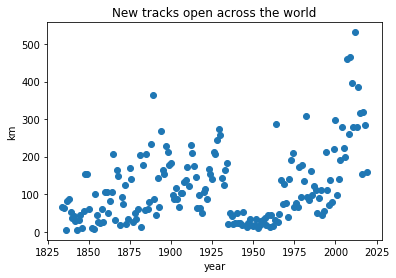

In [102]:
plt.scatter(r[:, 0], r[:, 1]/1000)
plt.xlabel('year')
plt.ylabel('km')
plt.title('New tracks open across the world')

# Problem 4. Map of transit system indicating size

In [105]:
# re-use the systems dict
systems

{'Berlin': 1.3293363861346605,
 'Edinburgh': 6.735829319259574,
 'Genoa': 7.7265681677903775,
 'Manchester': 8.413497978177798,
 'San Francisco': 9.315227637030159,
 'Caracas': 9.941884024849681,
 'Reims': 12.590044696919392,
 'Graz': 13.276470668168836,
 'Nice': 16.50396368384164,
 'Nancy': 20.10286082451035,
 'Naples': 24.10564125065654,
 'Salvador': 27.166441044528746,
 'Seattle': 29.9612634507052,
 'Tours': 30.01113370124601,
 'Cincinnati': 30.080927162949074,
 'Rouen': 31.753247545440058,
 'Le Havre': 32.36283579579625,
 'Brest': 33.19226910539576,
 'La Paz': 34.17525343690332,
 'Clermont-Ferrand': 34.26065314761194,
 'Besancon': 35.09832533332456,
 'Hong Kong': 35.36648703523101,
 'Angers': 37.248843797963616,
 'Zaragoza': 38.609896675440446,
 'Lima': 38.853388834485,
 'Bilbao': 39.44728126613679,
 'Le Mans': 40.136975854913956,
 'Dijon': 41.13902857341335,
 'Orleans': 46.07548157396888,
 'Toulouse': 46.324726409864525,
 'Innsbruck': 53.58863881277457,
 'Rennes': 53.7283065657751

In [106]:
cities

,name,coords,start_year,url_name,country,country_state
id,,,,,,
5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN
...,...,...,...,...,...,...
265,Nantes,POINT(-1.553889 47.217222),1877.0,nantes,France,NaN
110,Stockholm,POINT(18.05 59.28333333),1919.0,stockholm,Sweden,NaN
266,Rennes,POINT(-1.680833 48.114167),1897.0,rennes,France,NaN


In [115]:
city_points = np.array([parse_point(p) + [systems.get(name, 0)] for p, name in zip(cities['coords'], cities['name'])])

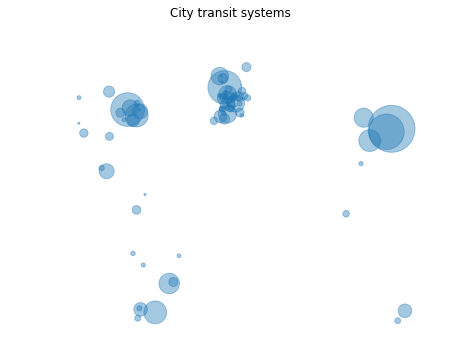

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(city_points[:, 0], city_points[:, 1], s=city_points[:,2]/2, alpha=0.4)
ax.axis('off')
ax.set_title('City transit systems')
fig.savefig('city-world.png')

In [ ]:
f